In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reviews_dd = pd.read_csv('data/Book_review.csv')

In [3]:
def dim():
  dimensions = len(set(reviews_dd['text'].str.split().explode().values))
  print(f'{dimensions} dimensions in the potential DFM.')
dim()

52779 dimensions in the potential DFM.


In [4]:
# top 20 words 
freq = pd.Series(' '.join(reviews_dd['text']).split()).value_counts()[:20]
freq

the     24650
and     18950
to      15593
a       14378
of      13953
is       9030
I        8732
in       8406
that     6459
for      5206
this     5106
with     4562
was      4321
book     4203
her      4078
it       3785
as       3408
are      3108
but      2754
on       2719
Name: count, dtype: int64

In [5]:
# convert all words into lower cases
reviews_dd['text'] = reviews_dd['text'].str.lower()

In [6]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielduque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stop = stopwords.words('english')
reviews_dd['text'] = reviews_dd['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [8]:
# top 20 words after removing stop words and making all words lower case
freq = pd.Series(' '.join(reviews_dd['text']).split()).value_counts()[:20]
freq
dim()

48355 dimensions in the potential DFM.


In [9]:
# remove punctuation
reviews_dd['text'] = reviews_dd['text'].str.replace(r'[^\w\s]+', '',regex=True)
dim()

30576 dimensions in the potential DFM.


In [10]:
# perform stremming
from nltk.stem import PorterStemmer
st = PorterStemmer()
reviews_dd['text'] = reviews_dd['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
dim()

21924 dimensions in the potential DFM.


In [11]:
# check top words
freq = pd.Series(' '.join(reviews_dd['text']).split()).value_counts()[:20]
freq

book       6546
read       2826
stori      2290
one        2134
love       1690
like       1661
time       1541
charact    1322
life       1218
make       1178
get        1119
author     1115
would      1056
well        985
also        967
way         963
it          953
first       943
famili      920
want        891
Name: count, dtype: int64

In [12]:
stop += ['make','get','would','well','also','way','it','first','want']
reviews_dd['text'] = reviews_dd['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [13]:
# check top words
freq = pd.Series(' '.join(reviews_dd['text']).split()).value_counts()[:20]
freq

book       6546
read       2826
stori      2290
one        2134
love       1690
like       1661
time       1541
charact    1322
life       1218
author     1115
famili      920
realli      875
mani        867
find        863
good        859
enjoy       851
much        842
seri        832
go          825
work        824
Name: count, dtype: int64

In [14]:
doc_complete = reviews_dd.text
doc_complete

0       bought book sincer attempt understand anyon ad...
1       read experi probabl deserv 4 star cruelli dedu...
2       seraphina arden wellknown scandal view equal p...
3       great book featur two wellwritten teenag main ...
4       book lot interest thing genet schizophrenia po...
                              ...                        
2803    book phenomen brilliantli written watch mauric...
2804    charact wonder stori realli drew joy go along ...
2805    second book compani love one beauti floral the...
2806    met lesli blodgett year ago grew love bare min...
2807    attract book long publish alkalin water machin...
Name: text, Length: 2808, dtype: object

In [15]:
# tokenize each review
corpus = [doc.split() for doc in doc_complete]
corpus

[['bought',
  'book',
  'sincer',
  'attempt',
  'understand',
  'anyon',
  'advoc',
  'social',
  'got',
  'descript',
  'problem',
  'follow',
  'bunch',
  'histori',
  'follow',
  'playbook',
  'launch',
  'socialist',
  'agenda',
  'lack',
  'connect',
  'social',
  'fact',
  'solv',
  'problem',
  'note',
  'start',
  'bookso',
  'problem',
  'author',
  'see',
  'live',
  'system',
  'exploit',
  'work',
  'peopl',
  'result',
  'class',
  'unfairli',
  'better',
  'everyon',
  'els',
  'grind',
  'thru',
  'life',
  'paycheck',
  'paycheck',
  'littl',
  'protect',
  'calam',
  'author',
  'state',
  'proof',
  'live',
  'social',
  'thing',
  'fair',
  'peopl',
  'better',
  'offw',
  'go',
  '6',
  'chapter',
  'recount',
  'histor',
  'movement',
  'time',
  'period',
  'variou',
  'form',
  'social',
  'partial',
  'fulli',
  'implement',
  'author',
  'give',
  'decent',
  'retel',
  'point',
  'good',
  'bad',
  'yet',
  'chapter',
  'found',
  'mani',
  'nuanc',
  'bia',


In [16]:
import gensim
from gensim import corpora, models

In [17]:
dictionary = corpora.Dictionary(corpus)

In [19]:
DFM = [dictionary.doc2bow(doc) for doc in corpus]
DFM

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 4),
  (38, 1),
  (39, 7),
  (40, 1),
  (41, 3),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 3),
  (47, 3),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 2),
  (68, 4),
  (69, 4),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 3),
  (74, 4),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 4),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 3),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [20]:
tfidf=models.TfidfModel(DFM)
DFM_tfidf=tfidf[DFM]

In [21]:
n_SVD=8

SVD_modeldd = models.LsiModel(DFM_tfidf, id2word=dictionary, num_topics=n_SVD)

SVD = SVD_modeldd[DFM_tfidf]

In [22]:
svd_array=gensim.matutils.corpus2csc(SVD).T.toarray()

In [25]:
svd_dfdd=pd.DataFrame(svd_array)
svd_dfdd

0         1         2         3         4         5         6  \
0    -0.191406  0.012127 -0.009529  0.002790 -0.018132  0.024119 -0.011393   
1    -0.183232  0.013216 -0.010405  0.002811 -0.015944  0.013457 -0.012257   
2    -0.235175  0.017902 -0.039276 -0.008786 -0.018686 -0.030314 -0.020728   
3    -0.296101  0.020777 -0.015158 -0.024434 -0.023121 -0.038914  0.003847   
4    -0.215194  0.012852 -0.020153 -0.004113 -0.006835  0.005025 -0.006236   
...        ...       ...       ...       ...       ...       ...       ...   
2803 -0.138473  0.008122 -0.003912 -0.000875 -0.021111  0.003061  0.020535   
2804 -0.160729 -0.124797 -0.035340 -0.006322 -0.019964 -0.021130 -0.002945   
2805 -0.080714  0.005380  0.024199  0.035532  0.005729 -0.013015  0.125253   
2806 -0.129651  0.007122  0.001642  0.001637 -0.013644  0.010777 -0.000130   
2807 -0.102407  0.007499  0.020213  0.027210 -0.001540  0.031209 -0.008653   

             7  
0    -0.068875  
1    -0.056625  
2    -0.012500  
3     0.044006  
4    -0.052749  
...        ...  
2803 -0.071432  
2804 -0.002856  
2805  0.029181  
2806 -0.050246  
2807 -0.041998  

[2808 rows x 8 columns]

In [26]:
svd_dfdd.columns = ['SVD_1','SVD_2','SVD_3','SVD_4','SVD_5','SVD_6','SVD_7','SVD_8']
svd_dfdd

SVD_1     SVD_2     SVD_3     SVD_4     SVD_5     SVD_6     SVD_7  \
0    -0.191406  0.012127 -0.009529  0.002790 -0.018132  0.024119 -0.011393   
1    -0.183232  0.013216 -0.010405  0.002811 -0.015944  0.013457 -0.012257   
2    -0.235175  0.017902 -0.039276 -0.008786 -0.018686 -0.030314 -0.020728   
3    -0.296101  0.020777 -0.015158 -0.024434 -0.023121 -0.038914  0.003847   
4    -0.215194  0.012852 -0.020153 -0.004113 -0.006835  0.005025 -0.006236   
...        ...       ...       ...       ...       ...       ...       ...   
2803 -0.138473  0.008122 -0.003912 -0.000875 -0.021111  0.003061  0.020535   
2804 -0.160729 -0.124797 -0.035340 -0.006322 -0.019964 -0.021130 -0.002945   
2805 -0.080714  0.005380  0.024199  0.035532  0.005729 -0.013015  0.125253   
2806 -0.129651  0.007122  0.001642  0.001637 -0.013644  0.010777 -0.000130   
2807 -0.102407  0.007499  0.020213  0.027210 -0.001540  0.031209 -0.008653   

         SVD_8  
0    -0.068875  
1    -0.056625  
2    -0.012500  
3     0.044006  
4    -0.052749  
...        ...  
2803 -0.071432  
2804 -0.002856  
2805  0.029181  
2806 -0.050246  
2807 -0.041998  

[2808 rows x 8 columns]

In [27]:
review_num_cols = reviews_dd[['rating','comments','Text_Len','Positivity','target']]
review_num_cols

rating  comments  Text_Len  Positivity  target
0          2         0      6978       0.113       1
1          3         0      6032       0.153       1
2          3         0      5469       0.132       1
3          4         0      5263       0.119       0
4          3         0      5309       0.078       1
...      ...       ...       ...         ...     ...
2803       5         0       473       0.097       0
2804       5         0       485       0.250       0
2805       5         0       504       0.240       1
2806       5         0       492       0.363       0
2807       5         0       494       0.199       1

[2808 rows x 5 columns]

In [32]:
model_dfdd = pd.concat([review_num_cols,svd_dfdd],axis=1)

model_dfdd

rating  comments  Text_Len  Positivity  target     SVD_1     SVD_2  \
0          2         0      6978       0.113       1 -0.191406  0.012127   
1          3         0      6032       0.153       1 -0.183232  0.013216   
2          3         0      5469       0.132       1 -0.235175  0.017902   
3          4         0      5263       0.119       0 -0.296101  0.020777   
4          3         0      5309       0.078       1 -0.215194  0.012852   
...      ...       ...       ...         ...     ...       ...       ...   
2803       5         0       473       0.097       0 -0.138473  0.008122   
2804       5         0       485       0.250       0 -0.160729 -0.124797   
2805       5         0       504       0.240       1 -0.080714  0.005380   
2806       5         0       492       0.363       0 -0.129651  0.007122   
2807       5         0       494       0.199       1 -0.102407  0.007499   

         SVD_3     SVD_4     SVD_5     SVD_6     SVD_7     SVD_8  
0    -0.009529  0.002790 -0.018132  0.024119 -0.011393 -0.068875  
1    -0.010405  0.002811 -0.015944  0.013457 -0.012257 -0.056625  
2    -0.039276 -0.008786 -0.018686 -0.030314 -0.020728 -0.012500  
3    -0.015158 -0.024434 -0.023121 -0.038914  0.003847  0.044006  
4    -0.020153 -0.004113 -0.006835  0.005025 -0.006236 -0.052749  
...        ...       ...       ...       ...       ...       ...  
2803 -0.003912 -0.000875 -0.021111  0.003061  0.020535 -0.071432  
2804 -0.035340 -0.006322 -0.019964 -0.021130 -0.002945 -0.002856  
2805  0.024199  0.035532  0.005729 -0.013015  0.125253  0.029181  
2806  0.001642  0.001637 -0.013644  0.010777 -0.000130 -0.050246  
2807  0.020213  0.027210 -0.001540  0.031209 -0.008653 -0.041998  

[2808 rows x 13 columns]

In [34]:
# X = all independent variables
Xdd = model_dfdd.drop('target', axis=1)  # replace 'target_column' with your actual target

# y = target variable
ydd = model_dfdd['target']

In [35]:
from sklearn.model_selection import train_test_split

Xdd_train, Xdd_test, ydd_train, ydd_test = train_test_split(
    Xdd, ydd, test_size=0.3, random_state=0  # adjust test_size as needed
)


In [41]:
from sklearn.tree import DecisionTreeClassifier
treedd = DecisionTreeClassifier(random_state=0,max_depth=4,min_samples_split=30)
treedd.fit(Xdd_train, ydd_train)
tree_predictions = treedd.predict(Xdd_test)
tree_predictions
treedd.score(Xdd_train,ydd_train)

0.6330788804071247

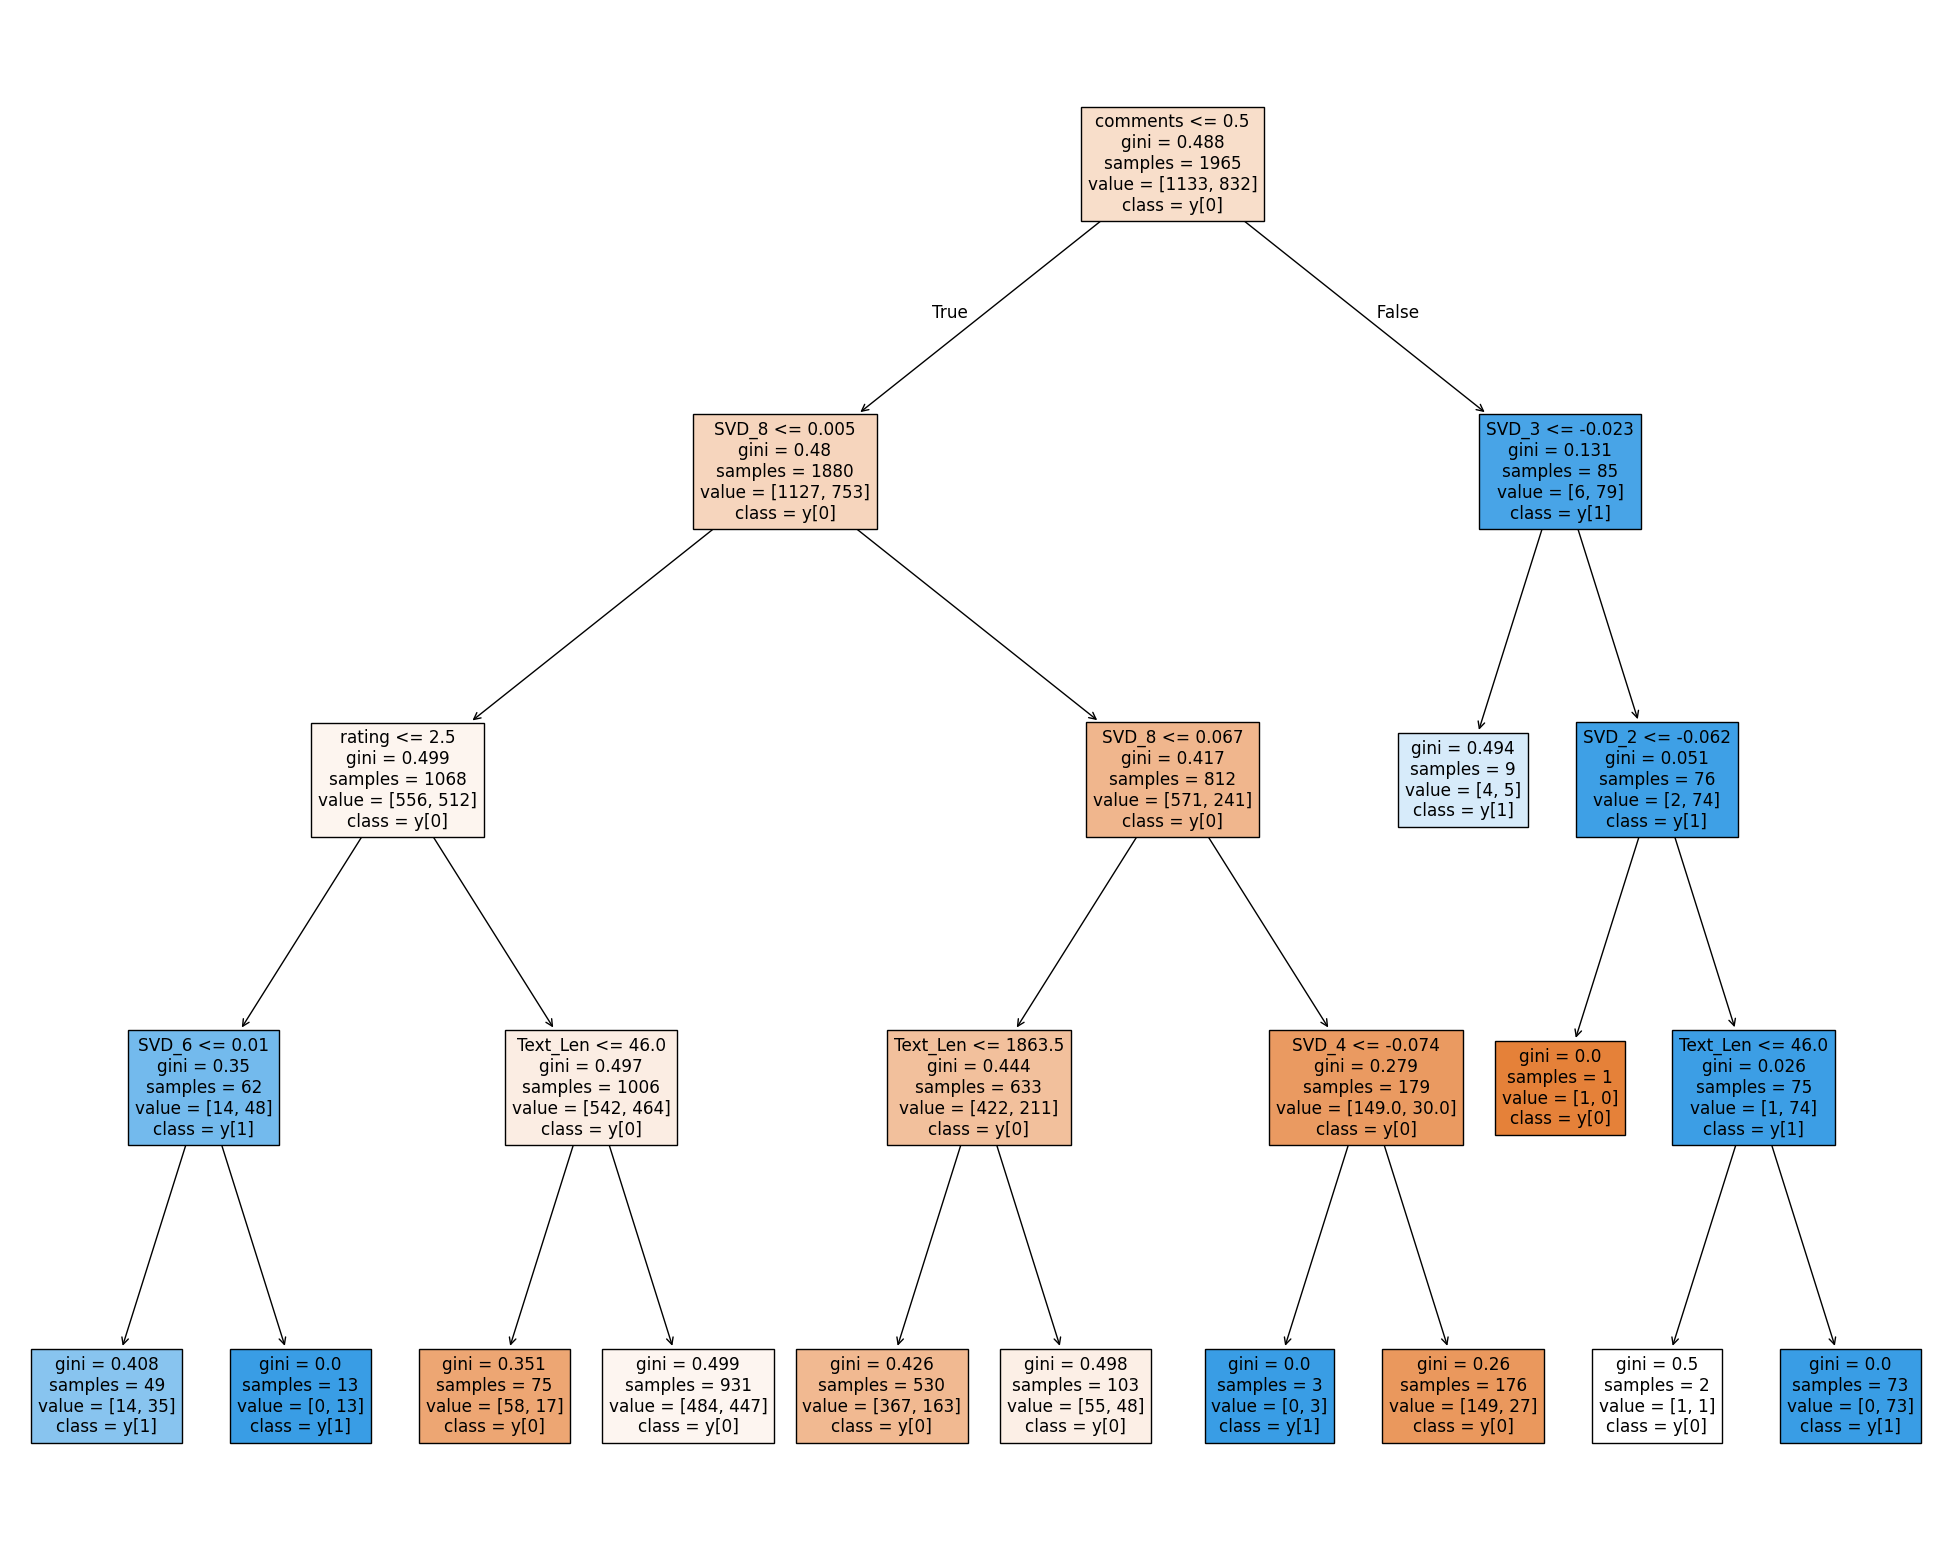

In [42]:
from sklearn import tree 
from matplotlib import pyplot as plt 
plt.figure(figsize=[25,20])
tree.plot_tree(treedd,
feature_names=list(Xdd_train.columns.values),
class_names=True,
filled=True)
plt.show()